In [18]:
import numpy as np
import matplotlib.pyplot as plt
from rcsj_sde.utils import symmetrize, hbar_over_2e
from rcsj_sde.junction import JosephsonJunction
from rcsj_sde.shapiro import run_shapiro

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Junction parameters and Shapiro simulation

In [19]:
Ic = 5.7e-07
R = 9
C = 8.8e-12
T = 0.25

F_ac = 2e9

a = 0
b = 1

jj = JosephsonJunction(Ic=Ic, a=a, b=b, R=R, C=C, T=T)

I_min = 0 # simulation start
I_max = 5.5*Ic  # simulation end
# I_max = 17*Ic; # simulation end

I_points = 100  # number of current values in the range
I_DC_range = np.linspace(I_min, I_max, I_points)  # ramp up only

tau_max = 4_000
tau_points = 40_000

power_points = 51
powers = np.linspace(-110, -60, power_points)  # power values in dB

dVdI, V = run_shapiro(jj, I_DC_range, F_ac, tau_max, tau_points, powers)


100%|██████████| 51/51 [01:04<00:00,  1.26s/it]


Plot the result.

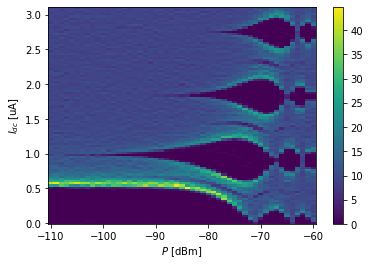

In [20]:
plt.figure()
plt.pcolormesh(powers, I_DC_range[:-1]/1e-6, dVdI.T, vmin=0, rasterized=True, shading="auto")
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$I_{dc}$ [uA]")
plt.colorbar()

# save to file
fname = f"shapiro_a_{a:f}_b_{b:f}"
# np.savez_compressed(fname, Vs=V, dVs=dVdI, f_ac=F_ac, I_DC_range=I_DC_range, powers=powers, a=a, b=b)

Calculate histogram.

C:\Users\GERGO~1.DES\AppData\Local\Temp/ipykernel_2884/992309486.py:10: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(powers, edges[:-1]/V_scaler, Vhist.T)


Text(0, 0.5, '$V_{dc} ~[\\frac{hf}{2e}]$')

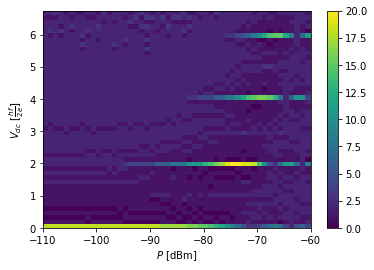

In [21]:
hist_bins = 50
V_scaler = hbar_over_2e*2*np.pi*F_ac
Vhist = np.empty((len(powers), hist_bins))
hist_range = [np.min(V[:]), np.max(V[:])]
edges = np.histogram_bin_edges(Vhist, bins=hist_bins, range=hist_range)

for pi, power in enumerate(powers):
    Vhist[pi,:], _ = np.histogram(V[pi,:], bins=edges)

plt.pcolor(powers, edges[:-1]/V_scaler, Vhist.T)
plt.colorbar()
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$V_{dc} ~[\frac{hf}{2e}]$")
# plt.savefig(f"shapiro_hist_a_{a:f}_b_{b:f}.pdf")

## Symmetric plots

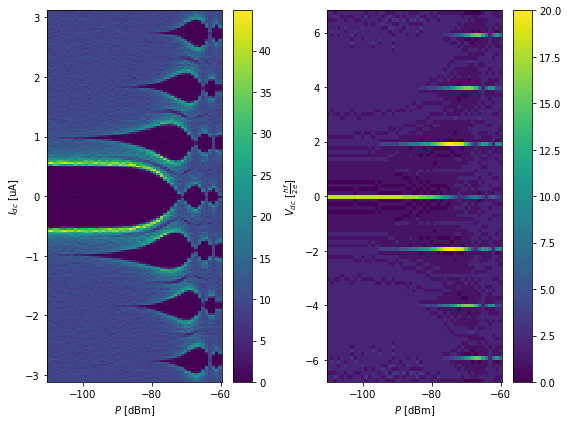

In [22]:
I_full = symmetrize(I_DC_range)
dVdI_full = symmetrize(dVdI)

fig, axs = plt.subplots(ncols=2, figsize=(8,6))

plt.sca(axs[0])
plt.pcolor(powers, I_full/1e-6, dVdI_full.T, vmin=0, rasterized=True, shading="auto")
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$I_{dc}$ [uA]")
plt.colorbar()

edges_sym = symmetrize(edges)
Vhist_sym = symmetrize(Vhist)

plt.sca(axs[1])

plt.pcolor(powers, edges_sym/V_scaler, Vhist_sym.T, rasterized=True, shading="auto")
plt.xlabel(r"$P$ [dBm]")
plt.ylabel(r"$V_{dc} ~[\frac{hf}{2e}]$")
plt.colorbar()

plt.tight_layout()
# plt.savefig(f"shapiro_double_a_{a:f}_b_{b:f}.pdf")

## Save to file

In [23]:
delimiter = ','

header = str(jj)
header += "\n" + f"tau_max = {tau_max:d}, tau_points = {tau_points:d}"
header += "\n" + f"F_ac = {F_ac:e}"

# np.savetxt(fname + "_powers.txt", powers, delimiter=delimiter, header=header)
# np.savetxt(fname + "_I_full.txt", I_full, delimiter=delimiter, header=header)  
# np.savetxt(fname + "_dVdI_full.txt", dVdI_full, delimiter=delimiter, header=header)
# np.savetxt(fname + "_V.txt", V, delimiter=delimiter, header=header)
# np.savetxt(fname + "_edges_sym.txt", edges_sym, delimiter=delimiter, header=header)